In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import os
import imageio
import requests
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install emoji


In [ ]:
!pip install requests imageio


In [ ]:
df = pd.read_csv("/content/Reddit_dataset.csv")

In [ ]:
df


,category,subreddit,post_id,comment_id,comment_body,comment_score,comment_ups,comment_downs,comment_author,comment_created_utc,sentiment_score
0,Sports,sports,7k6zaz,drc16wi,"To win it, he had to clean and jerk 10kg more ...",34730,34730,0,Vathsade,1.513433e+09,0.455000
1,Sports,sports,7k6zaz,drc0f23,Love to see the emotion swell and overflow; yo...,13154,13154,0,sumajyrag,1.513432e+09,0.500000
2,Sports,sports,7k6zaz,drc0bra,[Video](https://youtu.be/lssO92BNsJc) (w/ subt...,3105,3105,0,unknown_human,1.513432e+09,0.072222
3,Sports,sports,7k6zaz,drc1o20,This lift is the emotional lift I have and wil...,1179,1179,0,aec216,1.513434e+09,0.131776
4,Sports,sports,7k6zaz,drc0vvy,I need to go to the gym and work this cry off,1526,1526,0,ictoa88,1.513433e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
74002,Gaming,RocketLeague,5r86fe,dd5d1cu,she's not wrong,1,1,0,merlinfire,1.485880e+09,0.250000
74003,Gaming,RocketLeague,5r86fe,dd5d8hw,I got my girlfriend and a co-worker to play to...,1,1,0,ziggl,1.485880e+09,0.383333
74004,Gaming,RocketLeague,5r86fe,dd5dg56,"Well, she's not *wrong*",1,1,0,None,1.485881e+09,0.250000
74005,Gaming,RocketLeague,5r86fe,dd5dsge,pretty accurate,1,1,0,Aleblanco1987,1.485881e+09,0.325000


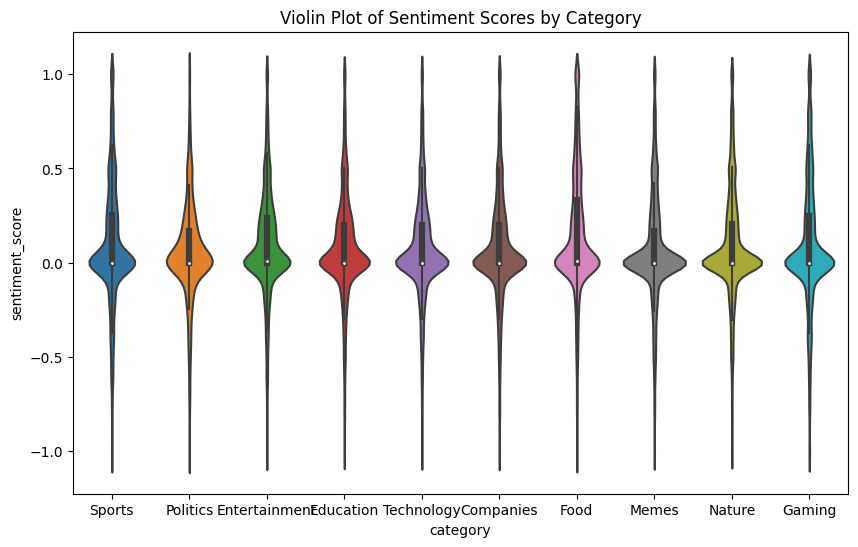

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='sentiment_score', data=df)
plt.title('Violin Plot of Sentiment Scores by Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


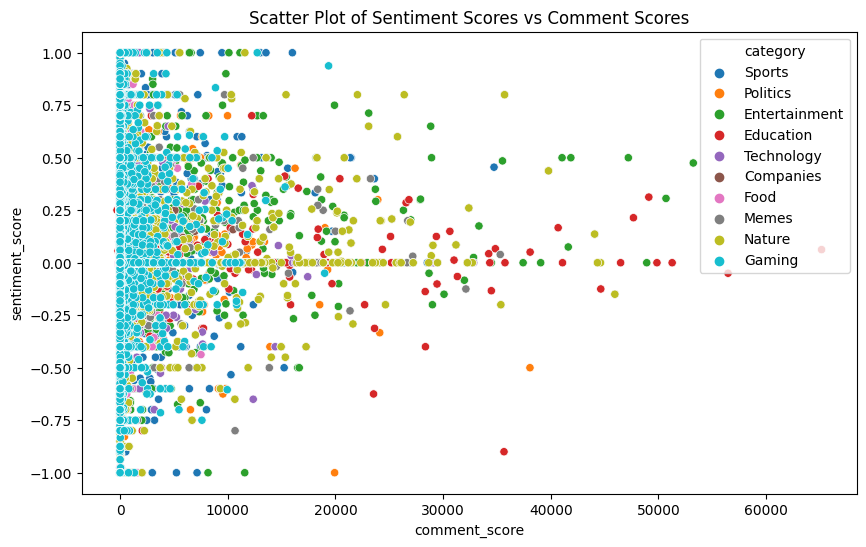

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_score', y='sentiment_score', hue='category', data=df)
plt.title('Scatter Plot of Sentiment Scores vs Comment Scores')
plt.show()


In [ ]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Text cleaning
    text = re.sub(r'\W', ' ', text)

    # Case normalization
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal and lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]

    return ' '.join(tokens)

# Drop missing values
df = df.dropna(subset=['comment_body'])

# Or fill missing values with an empty string or a string of your choice
df['comment_body'] = df['comment_body'].fillna("")



<ipython-input-8-08fb447a683b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_body'] = df['comment_body'].fillna("")


In [ ]:
import emoji
import re

def handle_emojis(text):
    # Convert emojis to words
    text = emoji.demojize(text)

    # Remove the colons around the word representation of the emoji
    text = text.replace(":", " ")

    return text

# Apply preprocessing to each comment
df['comment_body'] = df['comment_body'].apply(handle_emojis)


<ipython-input-9-bac0c53eec49>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_body'] = df['comment_body'].apply(handle_emojis)


In [ ]:
def handle_emoticons(text):
    # Define the most common emoticons
    emoticons = {
        ':)': 'happy',
        ':-)': 'happy',
        ':D': 'laugh',
        ':-D': 'laugh',
        ':(': 'sad',
        ':-(': 'sad',
        ';)': 'wink',
        ';-)': 'wink',
        ':/': 'skeptical',
        ':-/': 'skeptical',
        ':P': 'tongue out',
        ':-P': 'tongue out',
    }

    # Replace each emoticon with its meaning
    for emoticon, meaning in emoticons.items():
        text = text.replace(emoticon, f' {meaning} ')

    return text

# Apply preprocessing to each comment
df['comment_body'] = df['comment_body'].apply(handle_emoticons)


<ipython-input-10-50bfeac74a02>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_body'] = df['comment_body'].apply(handle_emoticons)


In [ ]:
def download_gif(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# Function to convert a GIF into a sequence of images
def gif_to_images(gif_path):
    gif = imageio.mimread(gif_path)
    for i, frame in enumerate(gif):
        imageio.imwrite(f'{gif_path}_frame_{i}.png', frame)

# Iterate over the comments in the dataset
for index, comment in df['comment_body'].iteritems():

    # Find URLs ending in .gif in the comment
    gif_urls = re.findall(r'(https?://[^\s]+\.gif)', comment)

    for url in gif_urls:
        # Download the GIF
        filename = f'gif_{index}.gif'
        download_gif(url, filename)

        # Convert the GIF into images
        gif_to_images(filename)

        # Delete the downloaded GIF
        os.remove(filename)


<ipython-input-11-c2c04031e5a8>:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, comment in df['comment_body'].iteritems():


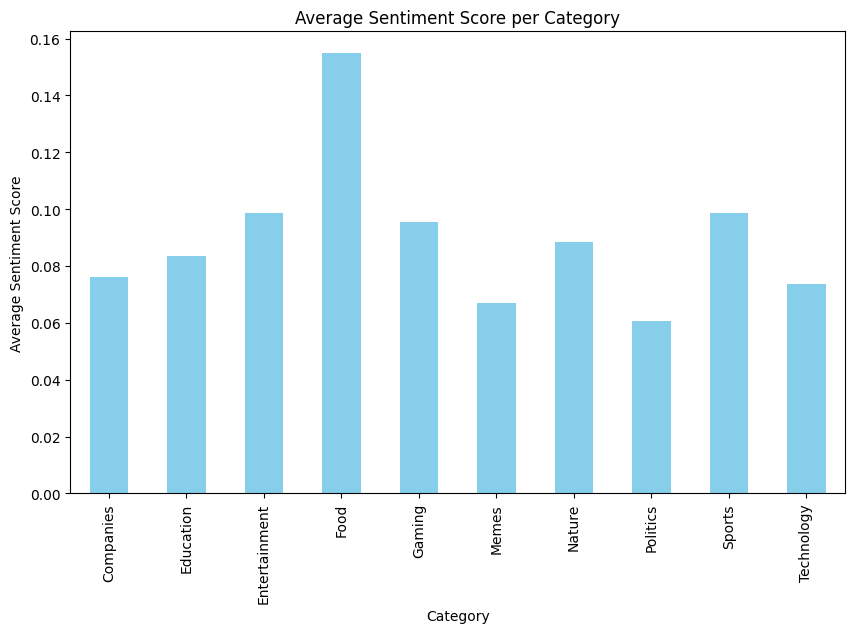

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_file.csv')

# Calculate average sentiment score for each category
average_sentiment = df.groupby('category')['sentiment_score'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
average_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


<ipython-input-13-bd59b91638d0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['category', 'comment_body', 'comment_score', 'sentiment_score', 'comment_created_utc']].corr()


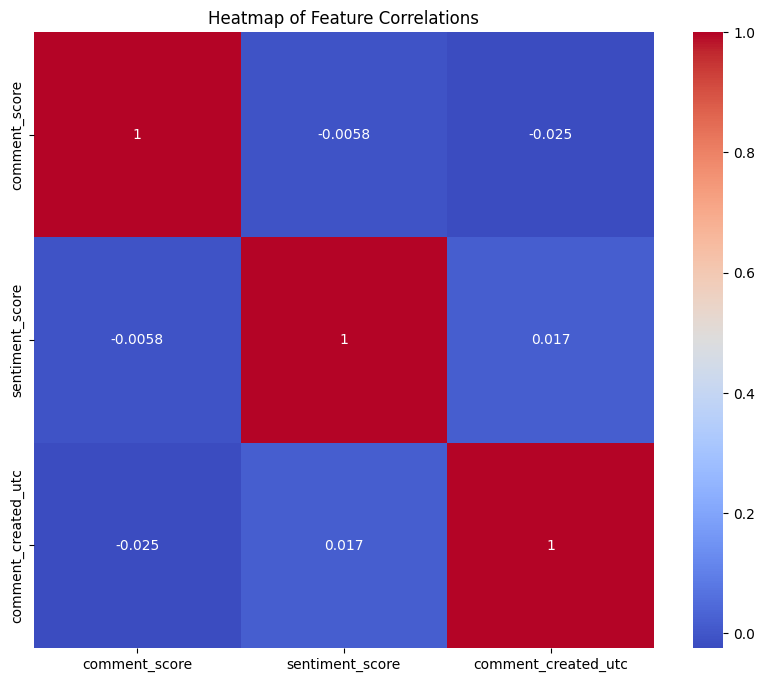

In [ ]:
import seaborn as sns

# Calculate correlations
corr = df[['category', 'comment_body', 'comment_score', 'sentiment_score', 'comment_created_utc']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [ ]:
df_sarcastic = pd.read_csv("/content/train-balanced-sarcasm.csv", error_bad_lines=False)


<ipython-input-14-3df5fae50ed1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_sarcastic = pd.read_csv("/content/train-balanced-sarcasm.csv", error_bad_lines=False)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk

# You might need to download the 'stopwords' package if you haven't already
nltk.download('stopwords')

# Assuming 'df_sarcastic' is your DataFrame of sarcastic Reddit comments and it has a 'label' column that indicates whether each comment is sarcastic
comments = df_sarcastic['comment'].fillna('')  # Fill NaN values with an empty string
labels = df_sarcastic['label']

# Split the data into training and test sets
comments_train, comments_test, labels_train, labels_test = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Transform the comments
comments_train_tfidf = vectorizer.fit_transform(comments_train)
comments_test_tfidf = vectorizer.transform(comments_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(comments_train_tfidf, labels_train)

# Test the model
print("Model accuracy: ", model.score(comments_test_tfidf, labels_test))

# Now, you can use this model to predict whether the comments in your original DataFrame are sarcastic
# Assuming 'df_original' is your original DataFrame
comments_original_tfidf = vectorizer.transform(df['comment_body'].fillna(''))  # Fill NaN values with an empty string
predictions = model.predict(comments_original_tfidf)

# Add the predictions as a new column in your original DataFrame
df['is_sarcastic'] = predictions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model accuracy:  0.6558570679540575


<ipython-input-15-f7ba0c8f16f1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_sarcastic'] = predictions


In [ ]:
# Get the predicted probabilities
probabilities = model.predict_proba(comments_original_tfidf)

# Add the probabilities as a new column in your original DataFrame
df['probability_sarcastic'] = probabilities[:, 1]


<ipython-input-16-89f8664e090e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['probability_sarcastic'] = probabilities[:, 1]


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
def update_sentiment(row):
    if row['is_sarcastic'] == 1:
        row['sentiment_score'] = - row['sentiment_score']
    return row

df = df.apply(update_sentiment, axis=1)


In [ ]:
df

,category,subreddit,post_id,comment_id,comment_body,comment_score,comment_ups,comment_downs,comment_author,comment_created_utc,sentiment_score,is_sarcastic,probability_sarcastic
0,Sports,sports,7k6zaz,drc16wi,"To win it, he had to clean and jerk 10kg more ...",34730,34730,0,Vathsade,1.513433e+09,-0.455000,1,0.561025
1,Sports,sports,7k6zaz,drc0f23,Love to see the emotion swell and overflow; yo...,13154,13154,0,sumajyrag,1.513432e+09,-0.500000,1,0.637583
2,Sports,sports,7k6zaz,drc0bra,[Video](https //youtu.be/lssO92BNsJc) (w/ subt...,3105,3105,0,unknown_human,1.513432e+09,0.072222,0,0.263593
3,Sports,sports,7k6zaz,drc1o20,This lift is the emotional lift I have and wil...,1179,1179,0,aec216,1.513434e+09,0.131776,0,0.181910
4,Sports,sports,7k6zaz,drc0vvy,I need to go to the gym and work this cry off,1526,1526,0,ictoa88,1.513433e+09,0.000000,0,0.415546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74002,Gaming,RocketLeague,5r86fe,dd5d1cu,she's not wrong,1,1,0,merlinfire,1.485880e+09,-0.250000,1,0.553323
74003,Gaming,RocketLeague,5r86fe,dd5d8hw,I got my girlfriend and a co-worker to play to...,1,1,0,ziggl,1.485880e+09,0.383333,0,0.301284
74004,Gaming,RocketLeague,5r86fe,dd5dg56,"Well, she's not *wrong*",1,1,0,None,1.485881e+09,-0.250000,1,0.604778
74005,Gaming,RocketLeague,5r86fe,dd5dsge,pretty accurate,1,1,0,Aleblanco1987,1.485881e+09,0.325000,0,0.391547


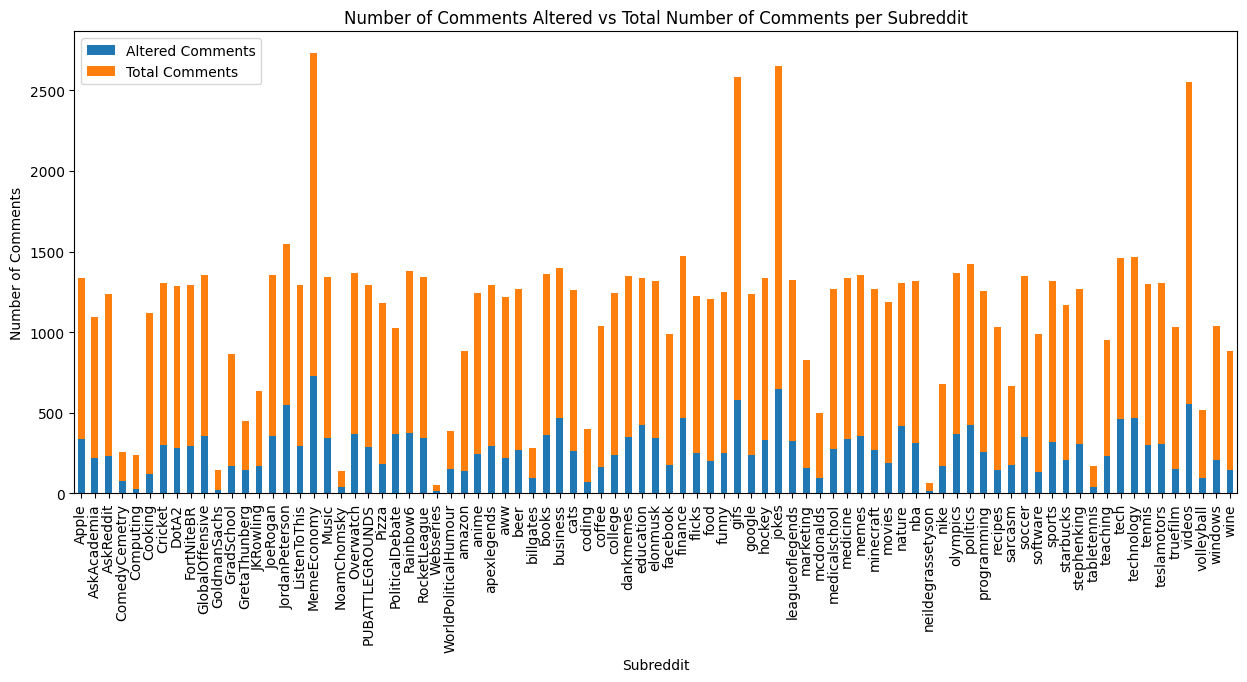

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of comments altered per subreddit
altered_comments = df[df['is_sarcastic'] == 1].groupby('subreddit').size()

# Calculate the total number of comments per subreddit
total_comments = df.groupby('subreddit').size()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Altered Comments': altered_comments, 'Total Comments': total_comments})

# Create a bar plot
plot_df.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Number of Comments Altered vs Total Number of Comments per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Comments')
plt.show()


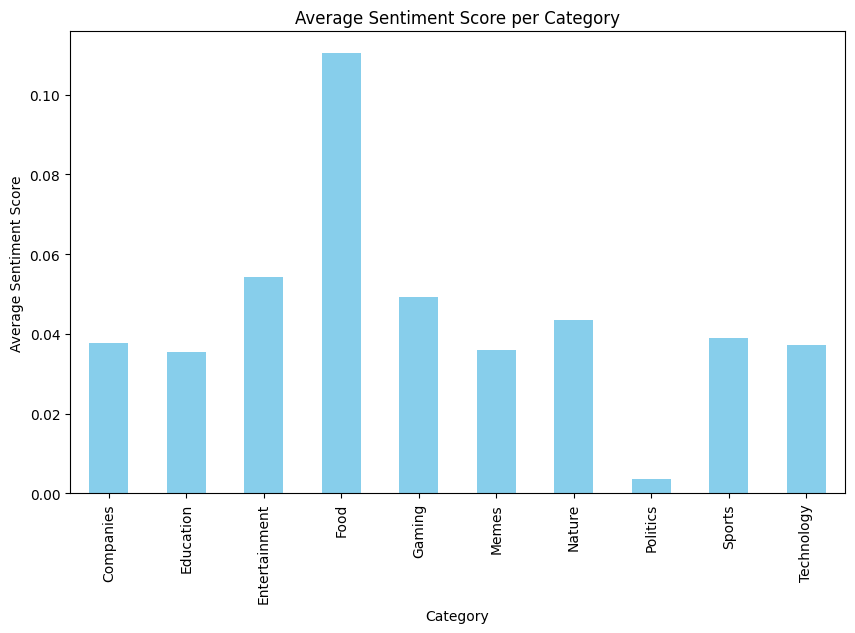

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_file.csv')

# Calculate average sentiment score for each category
average_sentiment = df.groupby('category')['sentiment_score'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
average_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


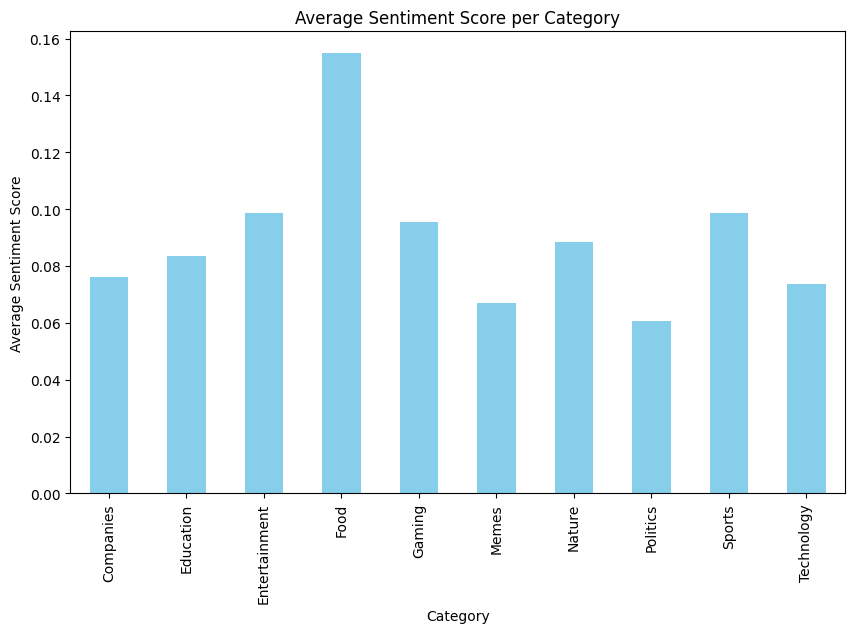

In [ ]:
data = pd.read_csv("/content/Reddit_dataset.csv")
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_file.csv')

# Calculate average sentiment score for each category
average_sentiment = data.groupby('category')['sentiment_score'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
average_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


In [ ]:
Reddit = df.to_csv("reddit.csv")

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have a pandas DataFrame df
#df = pd.read_csv("/content/reddit.csv")

df['sentiment_class'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)

# Then split the data
X_train, X_test, y_train, y_test = train_test_split(df['comment_body'], df['sentiment_class'], test_size=0.2, random_state=42)

# Convert the comments into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)

# Train a logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train_counts, y_train)

# Transform the test data and make predictions
X_test_counts = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_counts)

# Print the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

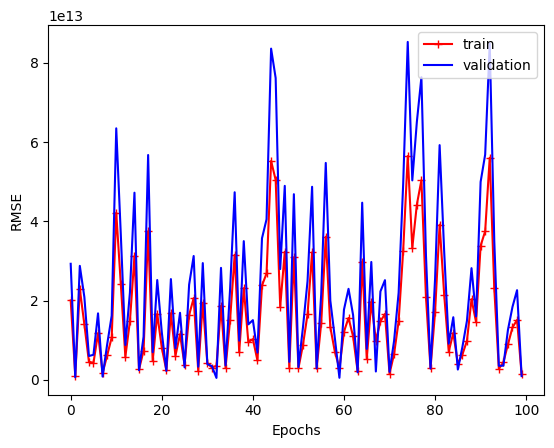

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = SGDRegressor(loss="squared_error", max_iter=1, warm_start=True, learning_rate="constant", eta0=0.01)

train_errors, val_errors = [], []

# Train for 100 epochs
for _ in range(100):
    model.fit(X_train_counts, y_train)
    y_train_predict = model.predict(X_train_counts)
    y_val_predict = model.predict(X_test_counts)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

# Plot the learning curves
plt.plot(np.sqrt(train_errors), "r-+", label="train")
plt.plot(np.sqrt(val_errors), "b-", label="validation")
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'df' is your DataFrame and 'comment_body' is the text you want to analyze
X = df['comment_body']
y = df['sentiment_score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the random forest regressor model
model = RandomForestRegressor()
model.fit(X_train_tfidf, y_train)

# Predict the sentiment score for the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the root mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Assuming 'df' is your DataFrame and 'comment_body' is the text you want to analyze
X = df['comment_body'].tolist()
y = df['is_sarcastic'].tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convert the tokenized data and labels into a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

# Train the BERT model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(6), epochs=1, batch_size=6)

# Evaluate the BERT model
model.evaluate(test_dataset.batch(16))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = SGDRegressor(loss="squared_loss", max_iter=1, warm_start=True, learning_rate="constant", eta0=0.01)

train_errors, val_errors = [], []

# Train for 100 epochs
for _ in range(100):
    model.fit(X_train_counts, y_train)
    y_train_predict = model.predict(X_train_counts)
    y_val_predict = model.predict(X_test_counts)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

# Plot the learning curves
plt.plot(np.sqrt(train_errors), "r-+", label="train")
plt.plot(np.sqrt(val_errors), "b-", label="validation")
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Assuming 'df' is your DataFrame and 'comment_body' is the text you want to analyze
X = df['comment_body'].tolist()
y = df['is_sarcastic'].tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)

# Convert the tokenized data and labels into a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

# Train the BERT model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_dataset.shuffle(1000), epochs=3)

# Evaluate the BERT model
model.evaluate(test_dataset)
